In [1]:
# In rhis code, we have tried to interpret the salient features to diagonise the unhealthy from healthy using the descriptive and inferentia statistics
#we have loaded the dataset and calculated the statistics and t testing along with their mean differences

# importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Loading the file into the dataframe
df = pd.read_csv('po1_data.csv')

In [6]:
# data wrangling
# inserting column names as given in the project and brief for the data set
column = [
    "Subject ID", "Jitter", "Jitter Abs", "Jitter RAP", "Jitter PPQ5", "Jitter DDPP",
    "Shimmer", "Shimmer Abs", "Shimmer APQ3", "Shimmer APQ5", "Shimmer APQ11", "Shimmer DDAP",
    "Harmonicity AutoCorr", "Harmonicity NHR", "Harmonicity HNR",
    "Pitch Median", "Pitch Mean", "Pitch Std", "Pitch Min", "Pitch Max",
    "Pulse Num", "Pulse Periods", "Pulse Mean", "Pulse Std",
    "Voice Unvoiced", "Voice Breaks Num", "Voice Breaks Degree",
    "UPDRS", "PD Indicator"
]
df.columns = column

In [7]:
# Data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Subject ID            1039 non-null   int64  
 1   Jitter                1039 non-null   float64
 2   Jitter Abs            1039 non-null   float64
 3   Jitter RAP            1039 non-null   float64
 4   Jitter PPQ5           1039 non-null   float64
 5   Jitter DDPP           1039 non-null   float64
 6   Shimmer               1039 non-null   float64
 7   Shimmer Abs           1039 non-null   float64
 8   Shimmer APQ3          1039 non-null   float64
 9   Shimmer APQ5          1039 non-null   float64
 10  Shimmer APQ11         1039 non-null   float64
 11  Shimmer DDAP          1039 non-null   float64
 12  Harmonicity AutoCorr  1039 non-null   float64
 13  Harmonicity NHR       1039 non-null   float64
 14  Harmonicity HNR       1039 non-null   float64
 15  Pitch Median         

In [8]:
df.head()

,Subject ID,Jitter,Jitter Abs,Jitter RAP,Jitter PPQ5,Jitter DDPP,Shimmer,Shimmer Abs,Shimmer APQ3,Shimmer APQ5,...,Pitch Max,Pulse Num,Pulse Periods,Pulse Mean,Pulse Std,Voice Unvoiced,Voice Breaks Num,Voice Breaks Degree,UPDRS,PD Indicator
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


In [9]:
# dropping the column that are not needed
all_datas = df.drop(["Subject ID", "UPDRS", "PD Indicator"], axis = 1)
# descriptive statistics of all data 
all_datas.describe()

,Jitter,Jitter Abs,Jitter RAP,Jitter PPQ5,Jitter DDPP,Shimmer,Shimmer Abs,Shimmer APQ3,Shimmer APQ5,Shimmer APQ11,...,Pitch Std,Pitch Min,Pitch Max,Pulse Num,Pulse Periods,Pulse Mean,Pulse Std,Voice Unvoiced,Voice Breaks Num,Voice Breaks Degree
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,...,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2.680669,0.000170,1.247387,1.348861,3.742164,12.922803,1.195296,5.700738,7.986800,12.220556,...,27.564113,134.530699,234.921514,109.695861,105.918191,0.006547,0.000843,27.709500,1.135707,12.381948
std,1.765515,0.000106,0.979874,1.139160,2.939680,5.452972,0.420075,3.016411,4.842089,6.016810,...,36.686430,47.080115,121.590903,150.091841,149.479959,0.001876,0.000723,20.967781,1.615157,15.164353
min,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,0.517000,...,0.533000,67.957000,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000
25%,1.509000,0.000095,0.617000,0.664500,1.851500,9.366000,0.943500,3.702000,5.162500,8.094000,...,7.291000,100.836500,143.646500,42.500000,40.500000,0.005038,0.000404,8.180000,0.000000,0.000000
50%,2.398000,0.000151,1.037000,1.127000,3.111000,12.349000,1.182000,5.136000,7.051000,11.445000,...,12.810000,127.266000,196.108000,65.000000,62.000000,0.006486,0.000645,26.531000,1.000000,5.850000
75%,3.413000,0.000229,1.603000,1.695500,4.810000,15.497500,1.411000,6.953000,9.564620,15.306125,...,27.578000,159.792500,264.125500,113.000000,109.000000,0.007924,0.000980,43.072500,1.000000,22.294000
max,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,...,293.877000,452.083000,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000


In [10]:
# sectioning the dataset into PPD and healthy according to the PD Indicator
ppd = df[df["PD Indicator"] == 1]
healthy = df[df["PD Indicator"] == 0]

In [11]:
# dropping the columns that are not needed and descriptive statistics according to its PPD and healthy indicator
ppd_describe = ppd.drop(["Subject ID", "UPDRS", "PD Indicator"], axis = 1)
healthy_describe = healthy.drop(["Subject ID", "UPDRS", "PD Indicator"], axis = 1)

In [12]:
# showing the descriptive statistics of PPD group includes mean median etc
print("Descriptive Statistics for PPD group: ")
print(ppd_describe.describe())

Descriptive Statistics for PPD group: 
           Jitter  Jitter Abs  Jitter RAP  Jitter PPQ5  Jitter DDPP  \
count  519.000000  519.000000   519.00000   519.000000   519.000000   
mean     2.854252    0.000188     1.35674     1.475903     4.070214   
std      1.681113    0.000113     0.91818     1.019948     2.754580   
min      0.195000    0.000010     0.06200     0.091000     0.185000   
25%      1.717500    0.000105     0.75250     0.802500     2.257500   
50%      2.627000    0.000169     1.17900     1.257000     3.538000   
75%      3.647500    0.000258     1.78050     1.931500     5.341500   
max     10.439000    0.000713     6.12500     7.205000    18.375000   

          Shimmer  Shimmer Abs  Shimmer APQ3  Shimmer APQ5  Shimmer APQ11  \
count  519.000000   519.000000    519.000000    519.000000     519.000000   
mean    12.976704     1.207135      5.647055      7.880583      13.107382   
std      4.710630     0.365432      2.486535      3.514261       6.328493   
min      2.17

In [13]:
# showing the descriptive statistics of healthy group includes mean median etc
print("Descriptive Statistics for healthy group: ")
print (healthy_describe.describe())

Descriptive Statistics for healthy group: 
           Jitter  Jitter Abs  Jitter RAP  Jitter PPQ5  Jitter DDPP  \
count  520.000000  520.000000  520.000000   520.000000   520.000000   
mean     2.507421    0.000153    1.138244     1.222062     3.414746   
std      1.831170    0.000096    1.027124     1.234842     3.081448   
min      0.190000    0.000006    0.084000     0.081000     0.252000   
25%      1.381750    0.000087    0.528000     0.578250     1.584000   
50%      2.214000    0.000134    0.907000     0.967500     2.720000   
75%      3.052000    0.000202    1.401000     1.467250     4.204000   
max     14.376000    0.000777    8.016000    13.542000    24.048000   

          Shimmer  Shimmer Abs  Shimmer APQ3  Shimmer APQ5  Shimmer APQ11  \
count  520.000000   520.000000    520.000000    520.000000     520.000000   
mean    12.869006     1.183479      5.754319      8.092812      11.335434   
std      6.108741     0.468361      3.467099      5.877320       5.555173   
min      

In [14]:
# excluding the columns and number of rows for arranging box plot of different features
visualiseBox = df.columns[1:-2]
lenth = len(visualiseBox)
numRows = (lenth + 1) // 2

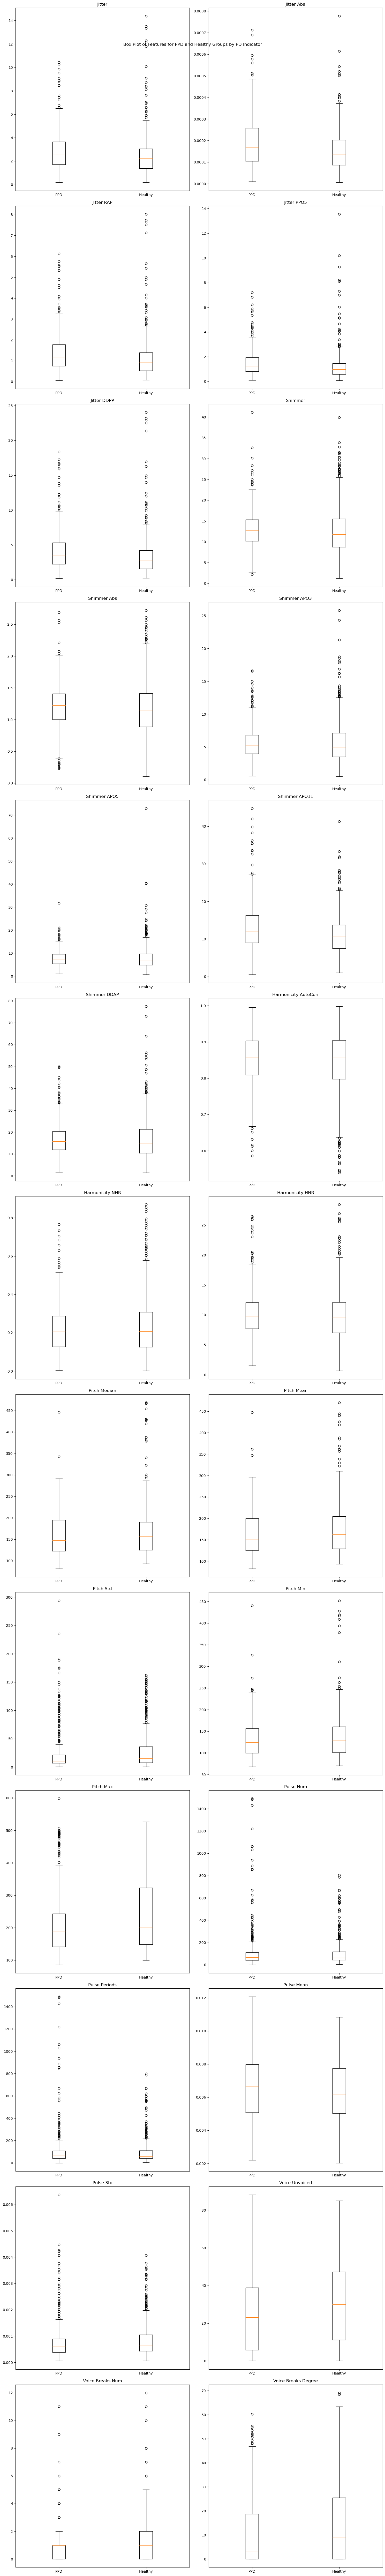

In [15]:
# number of rows and columns and the width and height of the grid
fig, axes = plt.subplots(numRows, 2, figsize=(15, 100))
fig.suptitle("Box Plot of Features for PPD and Healthy Groups by PD Indicator")
for i, feature in enumerate(visualiseBox):
    row = i // 2 #to find out the row index in the grid
    col = i % 2 #to find out the column index in the grid
    
    plt.sca(axes[row, col])
    #box plot into row and column with feature and respected labels
    plt.boxplot([ppd[feature], healthy[feature]], labels=["PPD", "Healthy"])
    plt.title(feature)
    
plt.tight_layout()
plt.show()

In [25]:
# performing t-tests for each feature and storing the salient features
salientFeatures = []
sigLevel = 0.05

for feature in visualiseBox:
    
    valuePPD = ppd[feature]
    valueHealth = healthy[feature]
    
    t_statistic, p_value = stats.ttest_ind(valuePPD, valueHealth)
    
    if p_value < sigLevel:
        salientFeatures.append(feature)
        print(f"Features: {feature}")
        print(f"T-Testing")
        print(f"T-statistic: {t_statistic}, p-value: {p_value}")
        print("Significant difference found!\n")
    else:
        print(f"Feature: {feature}")
        print(f"T-Testing")
        print(f"T-statistic: {t_statistic}, p-value: {p_value}")
        print("No significant difference found.\n")

print("Features with significant differences in diagonising the parkinson disease:", salientFeatures)

Features: Jitter
T-Testing
T-statistic: 3.179957964528876, p-value: 0.0015166306694224796
Significant difference found!

Features: Jitter Abs
T-Testing
T-statistic: 5.483006945218922, p-value: 5.2517055998338165e-08
Significant difference found!

Features: Jitter RAP
T-Testing
T-statistic: 3.6145918292716948, p-value: 0.00031527323464814003
Significant difference found!

Features: Jitter PPQ5
T-Testing
T-statistic: 3.612105844249591, p-value: 0.00031827364307247797
Significant difference found!

Features: Jitter DDPP
T-Testing
T-statistic: 3.614413628944979, p-value: 0.0003154874244601272
Significant difference found!

Feature: Shimmer
T-Testing
T-statistic: 0.3181733112700877, p-value: 0.7504175388743878
No significant difference found.

Feature: Shimmer Abs
T-Testing
T-statistic: 0.9075226884388011, p-value: 0.36434129477650257
No significant difference found.

Feature: Shimmer APQ3
T-Testing
T-statistic: -0.5729283921523461, p-value: 0.5668173829668095
No significant difference foun

In [26]:
#calculating meanDiff
meanDiff = []
for feature in salientFeatures:
    ppd_mean = ppd[feature].mean()
    healthy_mean = healthy[feature].mean()
    
    Differnce = abs(ppd_mean - healthy_mean)
    meanDiff.append((feature, Differnce))
#sorting in descending order
meanDiff.sort(key=lambda x: x[1], reverse=True)

#to get the top five feature 
top_5_features = meanDiff[:5]

print("Top 5 features with highest mean differences:")

#printing those top 
for feature, diff in top_5_features:
    print("Feature: ", feature)
    print(" Mean Difference: ", diff)
    print("------------------------------------------")

Top 5 features with highest mean differences:
Feature:  Pitch Max
 Mean Difference:  33.810474064028426
------------------------------------------
Feature:  Pitch Mean
 Mean Difference:  11.558032229138888
------------------------------------------
Feature:  Pitch Median
 Mean Difference:  9.447163246628122
------------------------------------------
Feature:  Pitch Std
 Mean Difference:  8.851500801837858
------------------------------------------
Feature:  Voice Unvoiced
 Mean Difference:  5.068937323995847
------------------------------------------


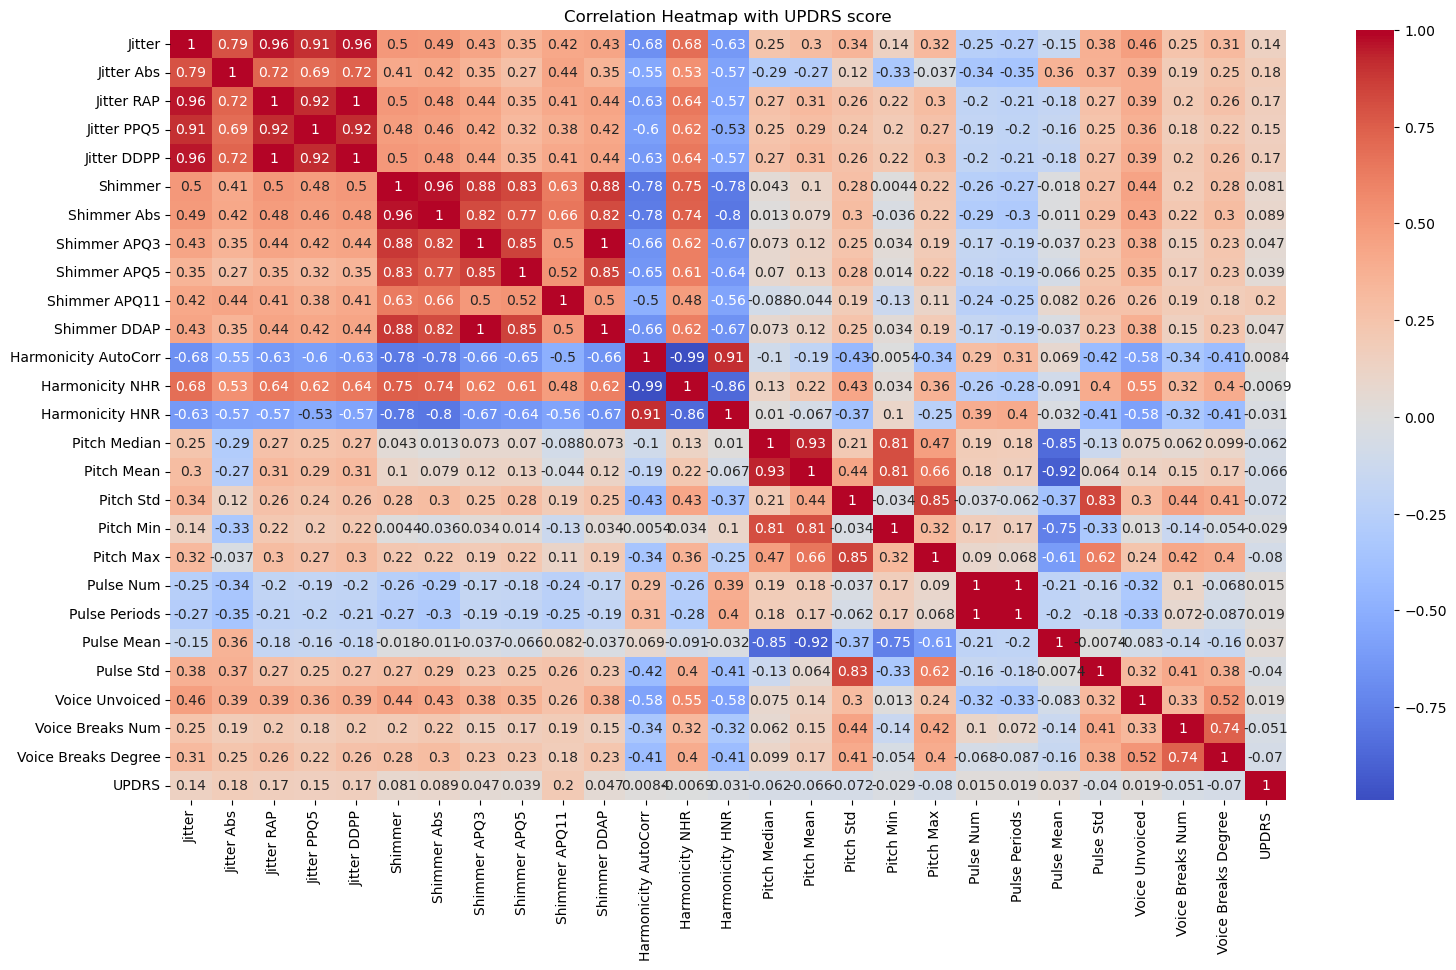

Correlations with UPDRS score:

UPDRS                   1.000000
Shimmer APQ11           0.200289
Jitter Abs              0.178234
Jitter DDPP             0.165889
Jitter RAP              0.165883
Jitter PPQ5             0.153176
Jitter                  0.140793
Shimmer Abs             0.088770
Shimmer                 0.081179
Shimmer DDAP            0.046945
Shimmer APQ3            0.046942
Shimmer APQ5            0.038606
Pulse Mean              0.037482
Voice Unvoiced          0.018960
Pulse Periods           0.018790
Pulse Num               0.014757
Harmonicity AutoCorr    0.008356
Harmonicity NHR        -0.006891
Pitch Min              -0.029427
Harmonicity HNR        -0.030836
Pulse Std              -0.039830
Voice Breaks Num       -0.050632
Pitch Median           -0.061680
Pitch Mean             -0.065595
Voice Breaks Degree    -0.069978
Pitch Std              -0.071718
Pitch Max              -0.079567
Name: UPDRS, dtype: float64


In [27]:
data = df.drop(["Subject ID", "PD Indicator"], axis = 1)

#building a heapmat to correlate features with UPDRS score
corrMatrix = data.corr()
#sixe of the heatmaps and the colour
plt.figure(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with UPDRS score")
plt.show()

# displaying correlation of features with UPDRS scores in a sorted way
updrs_correlations = corrMatrix["UPDRS"].sort_values(ascending=False)
print("Correlations with UPDRS score:\n")
print(updrs_correlations)